# FLights Dataset 

## Preliminary Wrangling

The original dataset reports flights in the United States, including carriers, arrival and departure delays, and reasons for delays, from 1987 to 2008.

I will analyse the data from 2004 till 2008. The data set can be downloaded from http://stat-computing.org/dataexpo/2009/the-data.html.

In [31]:
# import modules
import pandas as pd
import numpy as np
import os
import requests
import calendar


import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
flights_urls = ['http://stat-computing.org/dataexpo/2009/2004.csv.bz2',
'http://stat-computing.org/dataexpo/2009/2005.csv.bz2',
'http://stat-computing.org/dataexpo/2009/2006.csv.bz2',
'http://stat-computing.org/dataexpo/2009/2007.csv.bz2',
'http://stat-computing.org/dataexpo/2009/2008.csv.bz2']

In [ ]:
# download the dataset with pandas
flights_bz2 = 'flight_data_bz2'
#if not os.path.exists(flights_bz2):
#    os.makedirs(flights_bz2)

#for url in flights_urls:
#    response = requests.get(url)
#    with open (os.path.join(flights_bz2, url.split('/')[-1]), mode = 'wb') as file:
#        file.write(response.content)

## Gathering

In [2]:
df_2004= pd.read_csv('data/2004.csv', nrows=None, encoding='latin-1')
df_2004.shape

(7129270, 29)

In [3]:
df_2005= pd.read_csv('data/2005.csv', nrows=None, encoding='latin-1')
df_2005.shape

(7140596, 29)

In [4]:
df_2006= pd.read_csv('data/2006.csv', nrows=None, encoding='latin-1')
df_2006.shape

(7141922, 29)

In [5]:
df_2007= pd.read_csv('data/2007.csv', nrows=None, encoding='latin-1')
df_2007.shape

(7453215, 29)

In [6]:
df_2008= pd.read_csv('data/2008.csv', nrows=None, encoding='latin-1')
df_2008.shape

(7009728, 29)

In [7]:
# combine all datasets
df_combine = pd.concat([df_2004, df_2005, df_2006, df_2007, df_2008], ignore_index = True)

In [8]:
df = df_combine.copy()

In [9]:
# check shape
df.shape

(35874731, 29)

In [29]:
# check df
df.sample(10)

,Year,Month,DayofMonth,DayOfWeek,DepTime,ArrTime,UniqueCarrier,ArrDelay,DepDelay,Origin,Dest,Distance,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
28584135,2007,12,25,2,2110.0,2215.0,EV,9.0,25.0,ATL,CRW,363,0,NaN,0,0.0,0.0,0.0,0.0,0.0
574578,2004,1,5,1,2014.0,2211.0,DL,85.0,99.0,ATL,EWR,745,0,NaN,0,0.0,4.0,0.0,0.0,81.0
18280636,2006,7,20,4,851.0,1438.0,AA,18.0,-3.0,SJC,AUS,1476,0,NaN,0,0.0,0.0,18.0,0.0,0.0
11010271,2005,7,2,6,1401.0,1632.0,UA,6.0,16.0,LAX,HNL,2556,0,NaN,0,0.0,0.0,0.0,0.0,0.0
14488582,2006,1,15,7,816.0,1014.0,XE,39.0,1.0,ORF,EWR,284,0,NaN,0,0.0,0.0,39.0,0.0,0.0
23076501,2007,3,7,3,1613.0,1825.0,NW,2.0,5.0,ORD,DTW,235,0,NaN,0,0.0,0.0,0.0,0.0,0.0
7543338,2005,1,13,4,1235.0,1239.0,MQ,50.0,49.0,TVC,ORD,224,0,NaN,0,0.0,0.0,1.0,0.0,49.0
27712657,2007,11,23,5,2055.0,2200.0,WN,-5.0,-5.0,LAX,LAS,236,0,NaN,0,0.0,0.0,0.0,0.0,0.0
13243719,2005,11,20,7,1050.0,1205.0,WN,0.0,0.0,OAK,ONT,361,0,NaN,0,0.0,0.0,0.0,0.0,0.0
17060899,2006,5,31,3,1134.0,1236.0,AA,103.0,119.0,IND,DFW,762,0,NaN,0,103.0,0.0,0.0,0.0,0.0


## Assessing

In [13]:
# check df
df.head(30).T

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
Year,2004,2004,2004,2004,2004,2004,2004,2004,2004,2004,...,2004,2004,2004,2004,2004,2004,2004,2004,2004,2004
Month,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
DayofMonth,12,13,14,15,16,17,19,20,21,22,...,3,4,5,6,7,8,9,10,11,12
DayOfWeek,1,2,3,4,5,6,1,2,3,4,...,6,7,1,2,3,4,5,6,7,1
DepTime,623,621,633,627,635,628,650,627,623,626,...,1523,NaN,1622,NaN,NaN,NaN,1509,1554,1513,1511
CRSDepTime,630,630,630,630,630,630,630,630,630,630,...,1505,1505,1505,1505,1510,1510,1510,1520,1510,1510
ArrTime,901,911,920,859,918,905,944,904,903,901,...,1806,NaN,1855,NaN,NaN,NaN,1742,1831,1755,1736
CRSArrTime,915,915,915,915,915,915,915,915,915,915,...,1725,1725,1725,1725,1732,1732,1732,1744,1732,1732
UniqueCarrier,UA,UA,UA,UA,UA,UA,UA,UA,UA,UA,...,UA,UA,UA,UA,UA,UA,UA,UA,UA,UA
FlightNum,462,462,462,462,462,462,462,462,462,462,...,463,463,463,463,463,463,463,463,463,463


In [13]:
# check summary statistics
df.describe()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,...,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,3.587473e+07,3.587473e+07,3.587473e+07,3.587473e+07,3.519432e+07,3.587473e+07,3.511774e+07,3.587473e+07,3.587473e+07,3.511469e+07,...,3.587473e+07,3.572308e+07,3.573767e+07,3.587473e+07,3.587473e+07,3.038974e+07,3.038974e+07,3.038974e+07,3.038974e+07,3.038974e+07
mean,2.006002e+03,6.497322e+00,1.573347e+01,3.939221e+00,1.340919e+03,1.333538e+03,1.487646e+03,1.497880e+03,2.146725e+03,1.255632e+02,...,7.222724e+02,7.203942e+00,1.593024e+01,1.899953e-02,2.186553e-03,3.862715e+00,8.219373e-01,4.228451e+00,2.740586e-02,5.022907e+00
std,1.408290e+00,3.421688e+00,8.790448e+00,1.989782e+00,4.770142e+02,4.636682e+02,5.017726e+02,4.800665e+02,1.946001e+03,7.084262e+01,...,5.684041e+02,3.197506e+01,1.221479e+01,1.365231e-01,4.670944e-02,2.034398e+01,9.629806e+00,1.686806e+01,1.205019e+00,2.079925e+01
min,2.004000e+03,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,-7.100000e+02,...,6.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-4.900000e+01,0.000000e+00,0.000000e+00
25%,2.005000e+03,4.000000e+00,8.000000e+00,2.000000e+00,9.310000e+02,9.300000e+02,1.111000e+03,1.118000e+03,5.930000e+02,7.500000e+01,...,3.160000e+02,4.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.006000e+03,7.000000e+00,1.600000e+01,4.000000e+00,1.329000e+03,1.325000e+03,1.516000e+03,1.520000e+03,1.484000e+03,1.070000e+02,...,5.640000e+02,5.000000e+00,1.300000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,2.007000e+03,9.000000e+00,2.300000e+01,6.000000e+00,1.732000e+03,1.720000e+03,1.912000e+03,1.909000e+03,3.363000e+03,1.560000e+02,...,9.480000e+02,8.000000e+00,1.900000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,2.008000e+03,1.200000e+01,3.100000e+01,7.000000e+00,2.930000e+03,2.359000e+03,2.955000e+03,2.400000e+03,9.912000e+03,1.879000e+03,...,4.962000e+03,1.523000e+03,3.905000e+03,1.000000e+00,1.000000e+00,2.580000e+03,1.510000e+03,1.392000e+03,5.330000e+02,1.366000e+03


In [15]:
# check null
df.isna().sum()

Year                        0
Month                       0
DayofMonth                  0
DayOfWeek                   0
DepTime                680415
CRSDepTime                  0
ArrTime                756995
CRSArrTime                  0
UniqueCarrier               0
FlightNum                   0
TailNum                 83514
ActualElapsedTime      760045
CRSElapsedTime           1842
AirTime                760045
ArrDelay               760045
DepDelay               680415
Origin                      0
Dest                        0
Distance                    0
TaxiIn                 151649
TaxiOut                137058
Cancelled                   0
CancellationCode     35193119
Diverted                    0
CarrierDelay          5484993
WeatherDelay          5484993
NASDelay              5484993
SecurityDelay         5484993
LateAircraftDelay     5484993
dtype: int64

In [16]:
# check columns name
df.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

### Variable descriptions

 - **Year**:     2004 - 2008
 - **Month**	           1-12
 - **DayofMonth**	       1-31
 - **DayOfWeek**     	   1 (Monday) - 7 (Sunday)
 - **DepTime**	          actual departure time (local, hhmm)
 - **CRSDepTime** 	       scheduled departure time (local, hhmm) X
 - **ArrTime** 	       actual arrival time (local, hhmm)
 - **CRSArrTime**	       scheduled arrival time (local, hhmm)  X
 - **UniqueCarrier**	   unique carrier code                   X        
 - **FlightNum**	       flight number                         X
 - **TailNum**	           plane tail number                     X
 - **ActualElapsedTime**  in minutes
 - **CRSElapsedTime**	   in minutes
 - **AirTime**	           in minutes
 - **ArrDelay**	       arrival delay, in minutes
 - **DepDelay**	       departure delay, in minutes
 - **Origin**           origin IATA airport code
 - **Dest**	           destination IATA airport code
 - **Distance**	       in miles
 - **TaxiIn**	           taxi in time, in minutes
 - **TaxiOut**	           taxi out time in minutes
 - **Cancelled**	       was the flight cancelled?
 - **CancellationCode**   reason for cancellation (A = carrier, B = weather, C = NAS, D = security)
 - **Diverted**	       1 = yes, 0 = no
 - **CarrierDelay**	   in minutes
 - **WeatherDelay**	   in minutes
 - **NASDelay**	       in minutes
 - **SecurityDelay**	   in minutes
 - **LateAircraftDelay**  in minutes


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35874731 entries, 0 to 35874730
Data columns (total 29 columns):
Year                 int64
Month                int64
DayofMonth           int64
DayOfWeek            int64
DepTime              float64
CRSDepTime           int64
ArrTime              float64
CRSArrTime           int64
UniqueCarrier        object
FlightNum            int64
TailNum              object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin               object
Dest                 object
Distance             int64
TaxiIn               float64
TaxiOut              float64
Cancelled            int64
CancellationCode     object
Diverted             int64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
dtypes: float64(14), int64(10), object(5)
memory usage: 7.8+ GB


In [16]:
# check cancelled values und total no. for each
df.groupby("Cancelled").size().sort_values(ascending=False)  35114677

Cancelled
0    35193128
1      681603
dtype: int64

In [18]:
# check DepDelay statistics
df.DepDelay.describe()

count    3.519432e+07
mean     9.619999e+00
std      3.333300e+01
min     -1.200000e+03
25%     -4.000000e+00
50%      0.000000e+00
75%      8.000000e+00
max      2.601000e+03
Name: DepDelay, dtype: float64

In [19]:
# check ArrDelay statistics
df.ArrDelay.describe()     

count    3.511469e+07
mean     8.163351e+00
std      3.649756e+01
min     -1.302000e+03
25%     -9.000000e+00
50%     -1.000000e+00
75%      1.200000e+01
max      2.598000e+03
Name: ArrDelay, dtype: float64

In [20]:
# Out of all delayed flights, percent of cancelled
if cancel_delay[0] + cancel_delay[1] > 0:
    cancelled_ratio = cancel_delay[1] / (cancel_delay[0] + cancel_delay[1])
cancelled_ratio

0.01899952922295083

## What is the structure of your dataset?

> There are 35874731 observations in total from 2004 till 2008. A number of columns is 29 for the data set. Before we start analyzing data, data cleaning is essential.
Following points should be checked in the data set.
<p></p>

### Quality issue

- missing value for DepTime and ArrTime as well as ArrDelay and DepDelay
- missing CancellationCode
- missing CarrierDelay, WeatherDelay, NASDelay, SecurityDelay and LateAircraftDelay
- Cancelled is int64
- CancellationCode is object
- Year, Month, DayofMonth and DayOfWeek are int
- DepTime, ArrTime are float64
- ArrDelay, DepDelay are float64
- Cancelled is int64
- CarrierDelay, WeatherDelay, NASDelay, SecurityDelay and LateAircraftDelay are float64
  
### Structure issue

- There are un necessary column


### What is the structure of your dataset? From Diamond

There are 53,940 diamonds in the dataset with 10 features (carat, cut, color, clarity, depth, table, price, x, y, and z). Most variables are numeric in nature, but the variables cut, color, and clarity are ordered factor variables with the following levels.

(worst) ——> (best) <br>
cut: Fair, Good, Very Good, Premium, Ideal <br>
color: J, I, H, G, F, E, D <br>
clarity: I1, SI2, SI1, VS2, VS1, VVS2, VVS1, IF

### What is/are the main feature(s) of interest in your dataset?

I'm most interested in figuring out what features are best for predicting the price of the diamonds in the dataset.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I expect that carat will have the strongest effect on each diamond's price: the larger the diamond, the higher the price. I also think that the other big "C"s of diamonds: cut, color, and clarity, will have effects on the price, though to a much smaller degree than the main effect of carat.

## Univariate Exploration

I'll start by looking at the distribution of the main variable of interest: price.

## Cleaning
- Erroneous Datatype
- Manage missing values, Null values
- drop un necessary columns: 'CRSDepTime', 'CRSArrTime','TailNum','FlightNum', 'TaxiIn', 'TaxiOut','ActualElapsedTime','CRSElapsedTime','AirTime'

### Define
- Drop un necessary columns: 'CRSDepTime', 'CRSArrTime','TailNum','FlightNum', 'TaxiIn', 'TaxiOut','ActualElapsedTime','CRSElapsedTime','AirTime'

### Code

In [23]:
# drop un necessary columns
df.drop(['CRSDepTime', 'CRSArrTime','TailNum', 'FlightNum', 'TaxiIn','TaxiOut', 'ActualElapsedTime','CRSElapsedTime','AirTime'], axis=1, inplace=True)

### Test

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35874731 entries, 0 to 7009727
Data columns (total 21 columns):
Year                 int64
Month                int64
DayofMonth           int64
DayOfWeek            int64
DepTime              float64
ArrTime              float64
UniqueCarrier        object
ArrDelay             float64
DepDelay             float64
Origin               object
Dest                 object
Distance             int64
Cancelled            int64
CancellationCode     object
Diverted             int64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
day                  int64
dtypes: float64(9), int64(8), object(4)
memory usage: 5.9+ GB


In [26]:
df.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35874731 entries, 0 to 7009727
Data columns (total 21 columns):
Year                 35874731 non-null int64
Month                35874731 non-null int64
DayofMonth           35874731 non-null int64
DayOfWeek            35874731 non-null int64
DepTime              35194316 non-null float64
ArrTime              35117736 non-null float64
UniqueCarrier        35874731 non-null object
ArrDelay             35114686 non-null float64
DepDelay             35194316 non-null float64
Origin               35874731 non-null object
Dest                 35874731 non-null object
Distance             35874731 non-null int64
Cancelled            35874731 non-null int64
CancellationCode     681612 non-null object
Diverted             35874731 non-null int64
CarrierDelay         30389738 non-null float64
WeatherDelay         30389738 non-null float64
NASDelay             30389738 non-null float64
SecurityDelay        30389738 non-null float64
LateAircraftD

In [31]:
df['DepDate'] = pd.to_datetime(df.Year*10000+df.Month*100+df.DayofMonth,format='%Y%m%d')

In [32]:
df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,DepDate
0,2004,1,12,1,623.0,630,901.0,915,UA,462,...,11.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0,2004-01-12
1,2004,1,13,2,621.0,630,911.0,915,UA,462,...,16.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0,2004-01-13
2,2004,1,14,3,633.0,630,920.0,915,UA,462,...,15.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0,2004-01-14
3,2004,1,15,4,627.0,630,859.0,915,UA,462,...,10.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0,2004-01-15
4,2004,1,16,5,635.0,630,918.0,915,UA,462,...,13.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0,2004-01-16


In [29]:
df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,ArrTime,UniqueCarrier,ArrDelay,DepDelay,Origin,...,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,day,DepDate
0,2004,1,12,1,623.0,901.0,UA,-14.0,-7.0,ORD,...,0,NaN,0,0.0,0.0,0.0,0.0,0.0,1,2004-01-12
1,2004,1,13,2,621.0,911.0,UA,-4.0,-9.0,ORD,...,0,NaN,0,0.0,0.0,0.0,0.0,0.0,1,2004-01-13
2,2004,1,14,3,633.0,920.0,UA,5.0,3.0,ORD,...,0,NaN,0,0.0,0.0,0.0,0.0,0.0,1,2004-01-14
3,2004,1,15,4,627.0,859.0,UA,-16.0,-3.0,ORD,...,0,NaN,0,0.0,0.0,0.0,0.0,0.0,1,2004-01-15
4,2004,1,16,5,635.0,918.0,UA,3.0,5.0,ORD,...,0,NaN,0,0.0,0.0,0.0,0.0,0.0,1,2004-01-16


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35874731 entries, 0 to 7009727
Data columns (total 22 columns):
Year                 int64
Month                int64
DayofMonth           int64
DayOfWeek            int64
DepTime              float64
ArrTime              float64
UniqueCarrier        object
ArrDelay             float64
DepDelay             float64
Origin               object
Dest                 object
Distance             int64
Cancelled            int64
CancellationCode     object
Diverted             int64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
day                  int64
DepDate              datetime64[ns]
dtypes: datetime64[ns](1), float64(9), int64(8), object(4)
memory usage: 6.1+ GB


### Define
- convert CancellationCode into ordered categorical types

### Code

In [22]:
CancellationCode_dict = {'CancellationCode': ['A','B','C','D']}

for var in CancellationCode_dict:
    CancellationCode_var = pd.api.types.CategoricalDtype(ordered = True,categories = CancellationCode_dict[var])
    df[var] = df[var].astype(CancellationCode_var)

### Test

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35874731 entries, 0 to 35874730
Data columns (total 29 columns):
Year                 int64
Month                int64
DayofMonth           int64
DayOfWeek            int64
DepTime              float64
CRSDepTime           int64
ArrTime              float64
CRSArrTime           int64
UniqueCarrier        object
FlightNum            int64
TailNum              object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin               object
Dest                 object
Distance             int64
TaxiIn               float64
TaxiOut              float64
Cancelled            int64
CancellationCode     category
Diverted             int64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
dtypes: category(1), float64(14), int64(10), object(4)
memory usage

### Define
Manage missing values, Null values

### Code

In [11]:
df.dropna(subset=['DepTime'], inplace=True) 

In [15]:
df.dropna(subset=['ArrTime'], inplace=True) 

In [19]:
df.dropna(subset=['AirTime'], inplace=True) 

In [26]:
df.dropna(subset=['ArrDelay'], inplace=True) 

### Test

In [27]:
df.isna().sum()

Year                        0
Month                       0
DayofMonth                  0
DayOfWeek                   0
DepTime                     0
ArrTime                     0
UniqueCarrier               0
ArrDelay                    0
DepDelay                    0
Origin                      0
Dest                        0
Distance                    0
Cancelled                   0
CancellationCode     35114677
Diverted                    0
CarrierDelay          5330294
WeatherDelay          5330294
NASDelay              5330294
SecurityDelay         5330294
LateAircraftDelay     5330294
dtype: int64

In [28]:
df.shape

(35114686, 20)

### Define
- Change Year data type column from to Int to Year data type

### Code

In [32]:
df['Month'] = df['Month'].apply(lambda x: calendar.month_name[x])

### Test

In [ ]:
df.info()

In [76]:
df.sample(20)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
27932367,2007,November,23,5,1259.0,1305,2007.0,1957,US,744,...,4.0,18.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0
24974426,2007,June,12,2,2214.0,2219,2307.0,2322,9E,5866,...,6.0,10.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0
35839222,2008,December,28,7,1756.0,1725,2034.0,2025,CO,1712,...,7.0,13.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
12982562,2005,October,16,7,1958.0,1850,2359.0,2232,NW,846,...,8.0,28.0,0,NaN,0,0.0,68.0,19.0,0.0,0.0
19724286,2006,October,23,1,1057.0,1100,1244.0,1221,XE,3052,...,6.0,54.0,0,NaN,0,0.0,0.0,23.0,0.0,0.0
35633508,2008,December,28,7,632.0,540,1058.0,857,EV,5476,...,4.0,74.0,0,NaN,0,0.0,52.0,69.0,0.0,0.0
8805368,2005,March,4,5,2351.0,2355,614.0,605,B6,92,...,10.0,15.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0
35764536,2008,December,18,4,1327.0,1330,1644.0,1620,AA,321,...,7.0,14.0,0,NaN,0,0.0,0.0,24.0,0.0,0.0
25314325,2007,July,10,2,1104.0,1110,1147.0,1149,OO,5708,...,4.0,10.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0
7188104,2005,January,4,2,748.0,730,859.0,842,US,1711,...,4.0,11.0,0,NaN,0,17.0,0.0,0.0,0.0,0.0


### Define

### Code

### Test

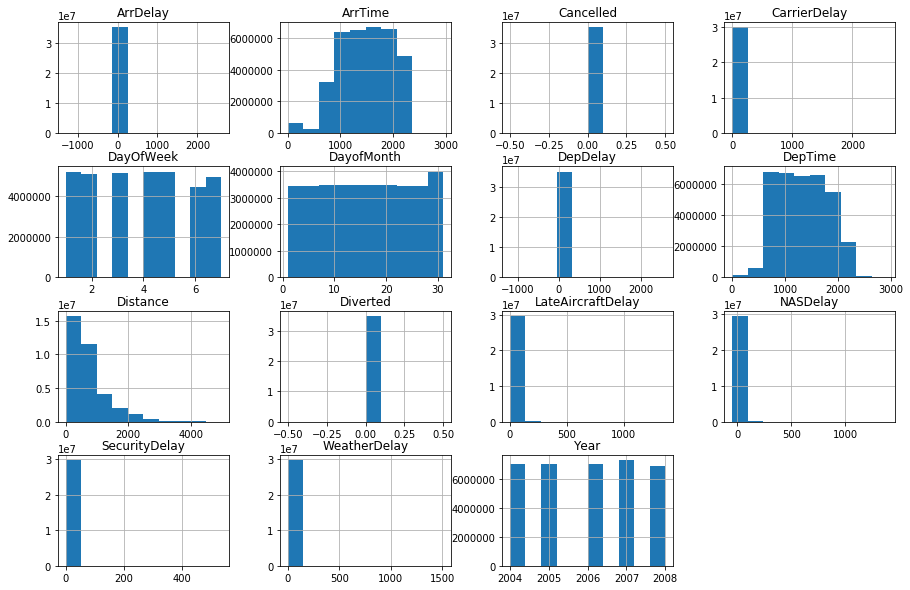

In [33]:
# check qucik histogram
df.hist(figsize=[15, 10]);

## Analysing

- Quantify the reasons behind flight delay by plotting the delay count. It is evident that Arrival and Departure delay is the biggest reasons behind the delay.
- Cancellation resons
- Delay reason per month, Day